In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.font_manager import fontManager
import numpy as np
import pandas as pd

# print(f"デフォルトのフォントファミリー: {plt.rcParams['font.family']}")
# print(f"デフォルトのフォント: {plt.rcParams['font.sans-serif']}")
# for font in fontManager.ttflist:
#     print(font.name)


plt.rcParams['font.family'] = 'DejaVu Sans'  # フォントをArialに設定
plt.rcParams['font.size'] = 10  # フォントサイズを設定
plt.rcParams['axes.labelsize'] = 12  # 軸ラベルのフォントサイズを設定
plt.rcParams['axes.titlesize'] = 14  # タイトルのフォントサイズを設定
plt.rcParams['xtick.labelsize'] = 10  # x軸目盛りラベルのフォントサイズを設定
plt.rcParams['ytick.labelsize'] = 10  # y軸目盛りラベルのフォントサイズを設定


os.makedirs('out/figs', exist_ok=True)

## fig1
- Draw pie chart ing fig1

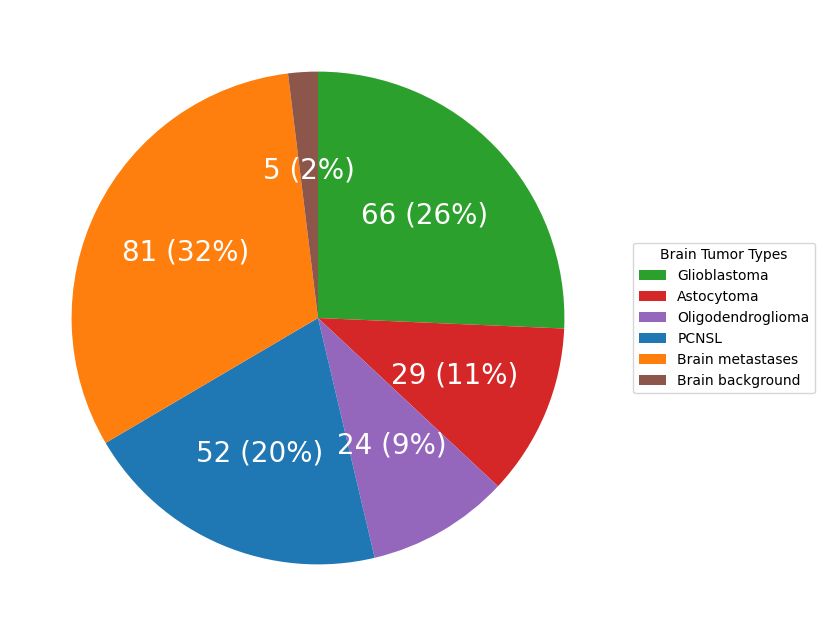

In [2]:
data = {
    'Glioblastoma': 66,
    'Astocytoma': 29,
    'Oligodendroglioma': 24,
    'PCNSL': 52,
    'Brain metastases': 81,
    'Brain background': 5,
}

colors = [
    'tab:green',
    'tab:red',
    'tab:purple',
    'tab:blue',
    'tab:orange',
    'tab:brown',
]

labels = list(data.keys())
counts = list(data.values())
total = sum(counts)

plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    counts, 
    labels=None,
    # labels=labels,
    autopct=lambda p: f'{round(p*total/100)} ({round(p)}%)',
    startangle=90, 
    counterclock=False, 
    colors=colors
)

for text in autotexts:
    text.set_fontsize(20)
    text.set_color('white')
plt.legend(wedges, labels, title="Brain Tumor Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.savefig("out/figs/fig1_pie.png", format="png", dpi=300)
plt.show()

## fig2

Shows counts per case based on Diagnosis.

In [3]:
from datasets import FoldDataset

ds = FoldDataset(
    source='enda4_512',
    fold=-1,
    total_fold=5,
    code='LMGAO_',
    limit=-1,
    upsample=False,
    target='all',
)
ds.df

Using cache files
loaded all for fold -1
Balance: cases
0 all:51 A:6 G:13 L:11 M:16 O:5
1 all:49 A:5 G:13 L:10 M:17 O:4
2 all:49 A:5 G:13 L:10 M:16 O:5
3 all:50 A:5 G:14 L:10 M:16 O:5
4 all:50 A:5 G:13 L:11 M:16 O:5
Balance: tiles
0 all:28630 A:2937 G:9142 L:4060 M:9375 O:3116
1 all:26404 A:2016 G:9627 L:2891 M:9711 O:2159
2 all:26055 A:2158 G:9942 L:3068 M:8412 O:2475
3 all:27244 A:2217 G:10332 L:3312 M:8806 O:2577
4 all:27053 A:2512 G:8900 L:3657 M:9066 O:2918


,name,diag,order,y,x,filename,original,width,height,area,count,fold,diag_org
0,18-0370,L,1,0,0,0000.jpg,18-0370_01.jpg,594,613,0.931928,75,1,L
1,18-0370,L,1,0,1,0001.jpg,18-0370_01.jpg,594,613,0.998371,75,1,L
2,18-0370,L,1,0,2,0002.jpg,18-0370_01.jpg,594,613,0.982631,75,1,L
3,18-0370,L,1,0,3,0003.jpg,18-0370_01.jpg,595,613,0.864837,75,1,L
4,18-0370,L,1,0,4,0004.jpg,18-0370_01.jpg,595,613,0.429498,75,1,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135381,N21-108,O,10,5,1,0463.jpg,N21-108_10.jpg,564,526,0.999778,468,4,O
135382,N21-108,O,10,5,2,0464.jpg,N21-108_10.jpg,564,526,0.999663,468,4,O
135383,N21-108,O,10,5,3,0465.jpg,N21-108_10.jpg,564,526,0.999537,468,4,O
135384,N21-108,O,10,5,4,0466.jpg,N21-108_10.jpg,564,526,0.999756,468,4,O


In [9]:
import seaborn as sns

fig = plt.figure(figsize=(14, 6))
ax = sns.countplot(
    ds.df,
    x='name',
    hue='diag',
    order=ds.df['name'].value_counts().index,
    # hue_order=['G', 'A', 'O', 'L', 'M'],
)
plt.xticks([])
plt.xlabel('Cases')
plt.ylabel('Patch count per case')  # y軸ラベルを変更

legend_full_names = {
    'G': 'Glioblastoma',
    'A': 'Astrocytoma,',
    'O': 'Oligodendroglioma',
    'L': 'PCNSL',
    'M': 'Brain Metastases',
}

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(
    [by_label[l] for l in legend_full_names],
    list(legend_full_names.values()),
    title='Diagnosis',
    loc='upper right'
)

for y in [500, 100, 50, 25, 10]:
    plt.axhline(y=y, color='gray', linestyle='--', alpha=0.5, linewidth=0.7)
plt.close()

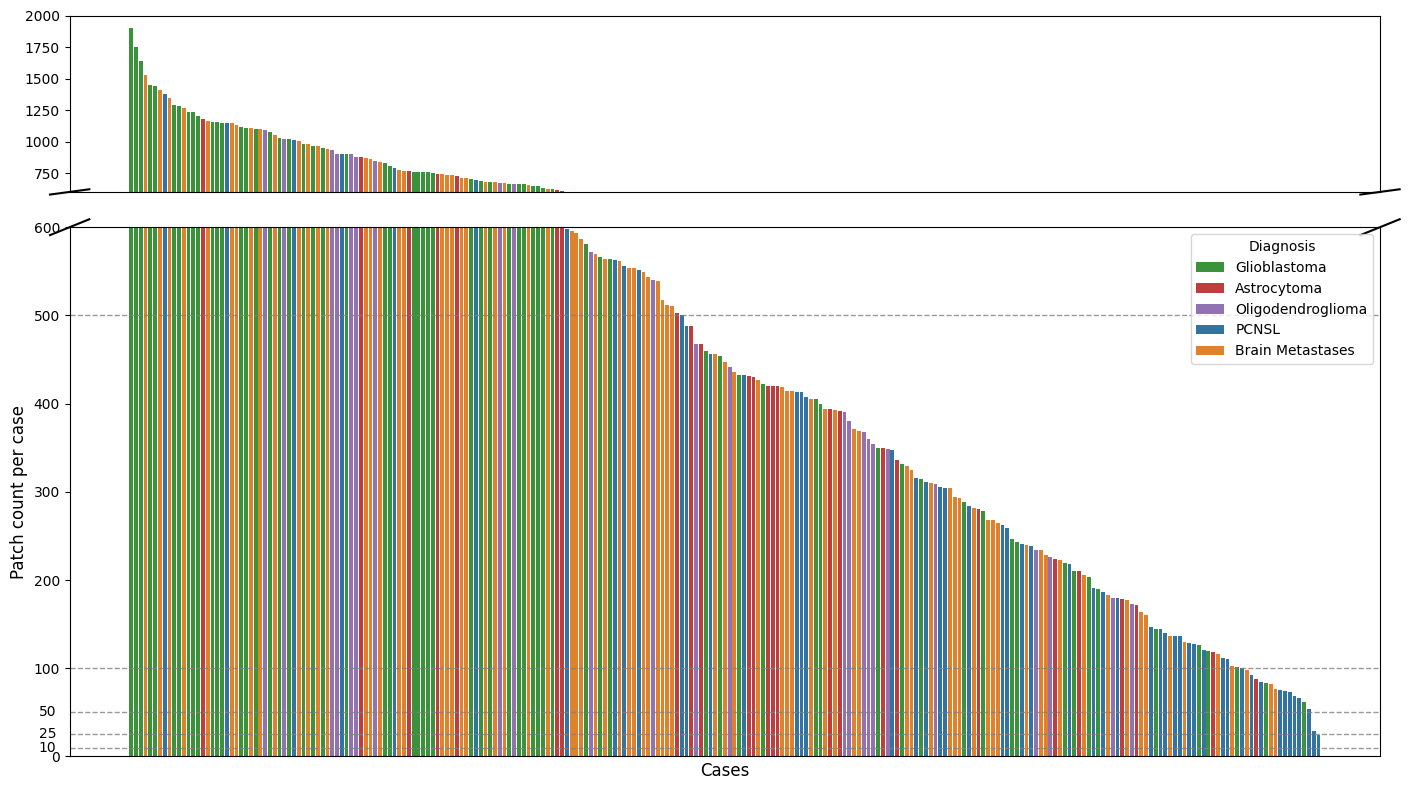

In [10]:
# Broken axis

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

# legendの順序と対応するfull name
legend_full_names = {
    'G': 'Glioblastoma',
    'A': 'Astrocytoma',
    'O': 'Oligodendroglioma',
    'L': 'PCNSL',
    'M': 'Brain Metastases',
}

# グラフを2つのサブプロットに分割
fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# データの最大値を取得
max_value = ds.df['diag'].value_counts().max()

# 上部のプロット（600以上）
sns.countplot(data=ds.df, x='name', hue='diag', order=ds.df['name'].value_counts().index, ax=ax1)
ax1.set_ylim(600, 2000)
ax1.set_xticks([])
ax1.set_xlabel('')

# 下部のプロット（0から600）
sns.countplot(data=ds.df, x='name', hue='diag', order=ds.df['name'].value_counts().index, ax=ax2)
ax2.set_ylim(0, 600)
ax2.set_xticks([])
ax2.set_xlabel('Cases')
ax2.set_yticks([0, 100, 200, 300, 400, 500, 600])

# y軸のラベルを設定
ax2.set_ylabel('Patch Count per Case')
ax1.set_ylabel('')

# 横線を追加（下部プロットのみ）
for y in [500, 100, 50, 25, 10]:
    ax2.axhline(y=y, color='gray', linestyle='--', alpha=0.8, linewidth=1)
    if y not in [500, 100]:
        ax2.text(-0.01, y, str(y), va='center', ha='right', transform=ax2.get_yaxis_transform())

# legendを手動で並べ替えてfull nameで表示（下部プロットにのみ配置）
handles, labels = ax2.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax2.legend(
    [by_label[l] for l in legend_full_names],
    list(legend_full_names.values()),
    title='Diagnosis',
    loc='upper right'
)
ax1.legend().remove()  # 上部プロットのlegendを削除

# プロット間の空白を調整
plt.tight_layout()
fig.subplots_adjust(hspace=0.1)

# 軸の分割を示す斜線を追加
d = .015  # サイズ
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# def draw_wave(ax, x, y, width, height, wavelength=0.1, amplitude=0.01):
#     t = np.linspace(0, width, 100)
#     ax.plot(x + t, y + amplitude * np.sin(2 * np.pi * t / wavelength), 
#             color='k', clip_on=False, transform=ax.transAxes)
# draw_wave(ax1, 0, -0.02, 1, 0.02)
# draw_wave(ax2, 0, 1.02, 1, 0.02)

plt.savefig("out/figs/fig2_count.png", format="png", dpi=300)
plt.show()

## Table2

Compare metrics between conditions

In [38]:
from scipy import stats
from functools import lru_cache

cache = {}
def load_df(p):
    if p in cache:
        return cache[p]
    df = pd.read_excel(p, sheet_name='report', index_col=0)
    cache[p] = df
    return df

def calc_score(values):
    se = stats.sem(values)
    mean = np.mean(values)
    cis = stats.t.interval(confidence=0.95, df=len(values)-1, loc=mean, scale=se)
    return [mean, *cis]

conds = [
    'frozen_uni',
    'frozen_gigapath',
    'unfrozen_uni',
    'unfrozen_baseline-vit',
    'unfrozen_baseline-cnn',
]

labels = [
    'UNI(FC)',
    'Prov-GigaPath(FC)',
    'UNI(Enc+FC)',
    'VIT-L(Enc+FC)',
    'ResNet-RS 50(Enc+FC)',
]

metrics = {
    'Accuracy': lambda df: df[df.index == 'accuracy'].iloc[0, 0],
    'F1 score': lambda df: df[df.index == 'macro avg'].iloc[0]['f1-score'],
    'Precision': lambda df: df[df.index == 'macro avg'].iloc[0]['precision'],
    'Recall': lambda df: df[df.index == 'macro avg'].iloc[0]['recall'],
    'AUROC ': lambda df: df[df.index == 'auc'].iloc[0, 0],
}

data = []
for cond in conds:
    scores = {}
    for m, fn in metrics.items():
        values = []
        for fold in range(5):
            p = f'out/compare/LMGAOB/fold5_{fold}/{cond}_100/test/report.xlsx'
            df = load_df(p)
            value = fn(df)
            values.append(value)
        score = calc_score(values)
        print(score)
        scores[m] = '{:.3f}±({:.3f}-{:.3f})'.format(*score)
    data.append(scores)

df = pd.DataFrame(data, index=labels)
df

[0.9443987341772152, 0.91573235761001, 0.9730651107444204]
[0.8797599740019957, 0.8108633372569862, 0.9486566107470051]
[0.8937737317149083, 0.832936982640831, 0.9546104807889855]
[0.8782158119658119, 0.7987263299235654, 0.9577052940080584]
[0.9942474024552161, 0.9889967277850538, 0.9994980771253785]
[0.9469303797468355, 0.9110110754960191, 0.9828496839976518]
[0.8769812342232559, 0.789841465339865, 0.9641210031066468]
[0.8895673825085589, 0.8117638437269329, 0.967370921290185]
[0.8807799145299147, 0.7942451630341752, 0.9673146660256541]
[0.9942638881338504, 0.9891937945317775, 0.9993339817359232]
[0.9217088607594937, 0.8841560234906698, 0.9592616980283175]
[0.8505545368843913, 0.7816427483726005, 0.9194663253961821]
[0.8702287581699346, 0.8010962173924907, 0.9393612989473785]
[0.8526555715526303, 0.7811120201548187, 0.9241991229504418]
[0.9935324035961308, 0.9883776838670841, 0.9986871233251775]
[0.8964240506329114, 0.8540922532436726, 0.9387558480221503]
[0.7876267699667143, 0.744970

,Accuracy,F1 score,Precision,Recall,AUROC
UNI(FC),0.944±(0.916-0.973),0.880±(0.811-0.949),0.894±(0.833-0.955),0.878±(0.799-0.958),0.994±(0.989-0.999)
Prov-GigaPath(FC),0.947±(0.911-0.983),0.877±(0.790-0.964),0.890±(0.812-0.967),0.881±(0.794-0.967),0.994±(0.989-0.999)
UNI(Enc+FC),0.922±(0.884-0.959),0.851±(0.782-0.919),0.870±(0.801-0.939),0.853±(0.781-0.924),0.994±(0.988-0.999)
VIT-L(Enc+FC),0.896±(0.854-0.939),0.788±(0.745-0.830),0.808±(0.726-0.889),0.810±(0.769-0.851),0.986±(0.981-0.991)
ResNet-RS 50(Enc+FC),0.934±(0.902-0.966),0.852±(0.780-0.923),0.875±(0.809-0.941),0.855±(0.784-0.926),0.993±(0.987-0.998)


## fig3

This fig shows the impact of patch number per case on model performace

```
$ python compare.py calc-macro
```

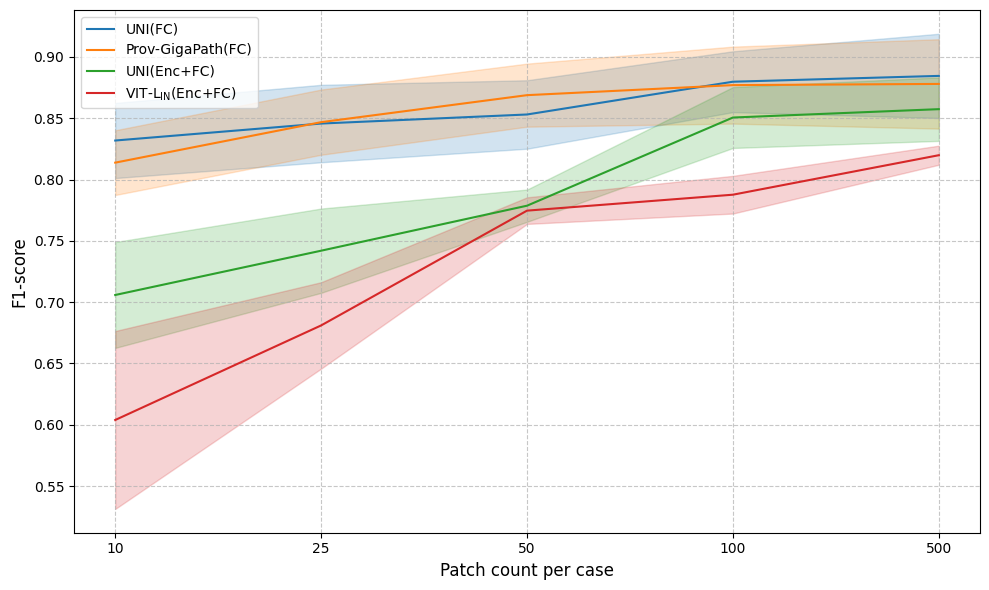

In [13]:
def draw_lines(target):
    if target == 'f1':
        score_fn = lambda df: df[df.index == 'macro avg'].iloc[0]['f1-score']
        title = 'F1 score'
    elif target == 'acc':
        score_fn = lambda df: df[df.index == 'accuracy'].iloc[0, 0]
        title = 'F1 score'
    else:
        raise RuntimeError('Invalid target', target)
    
    conds = [
        'frozen_uni',
        'frozen_gigapath',
        'unfrozen_uni',
        'unfrozen_baseline-vit',
    ]
    labels = [
        r'UNI(FC)',
        r'Prov-GigaPath(FC)',
        r'UNI(Enc+FC)',
        r'VIT-L$\mathrm{_{IN}}$(Enc+FC)',
    ]
    
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    limits = [10, 25, 50, 100, 500]
    alpha = 0.05
    
    values_by_cond = []
    for cond in conds:
        values = []
        for limit in limits:
            scores = []
            for fold in range(5):
                report_path = f'out/compare/LMGAOB/fold5_{fold}/{cond}_{limit}/test/report.xlsx'
                df = pd.read_excel(report_path, sheet_name='report', index_col=0)
                # score = df[df.index == 'macro avg'].iloc[0]['f1-score']
                # score = df[df.index == 'accuracy'].iloc[0, 0]
                score = score_fn(df)
                scores.append(score)
            mean = np.mean(scores)
            n = len(scores)
            std_err = np.std(scores, ddof=1) / np.sqrt(n)
            # ci = stats.t.interval(1 - alpha, df=n-1, loc=mean, scale=std_err)
            ci = [mean-std_err, mean+std_err]
            values.append([mean, *ci])
        values_by_cond.append(values)
    
    values_by_cond = np.array(values_by_cond)
    # print(values_by_cond)
    
    plt.figure(figsize=(10, 6))
    x = np.arange(1, 1+len(limits))
    
    for i in range(len(conds)):
        ci_l = values_by_cond[i, :, 1]
        ci_h = values_by_cond[i, :, 2]
        c = colors[i]
        plt.plot(x, values_by_cond[i, :, 0], color=c, label=labels[i])
        plt.fill_between(x, ci_l, ci_h, color=c, alpha=0.2)
    # plt.plot(x, y1, 'g-', label=labels[1])
    # plt.fill_between(x, ci1[:, 0], ci1[:, 1], color='g', alpha=0.2)
    
    plt.xticks(x, limits)
    
    plt.xlabel('Patch count per case')
    plt.ylabel('F1-score')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig("out/figs/fig3_lines.png", format="png", dpi=300)
    plt.show()
draw_lines('f1')


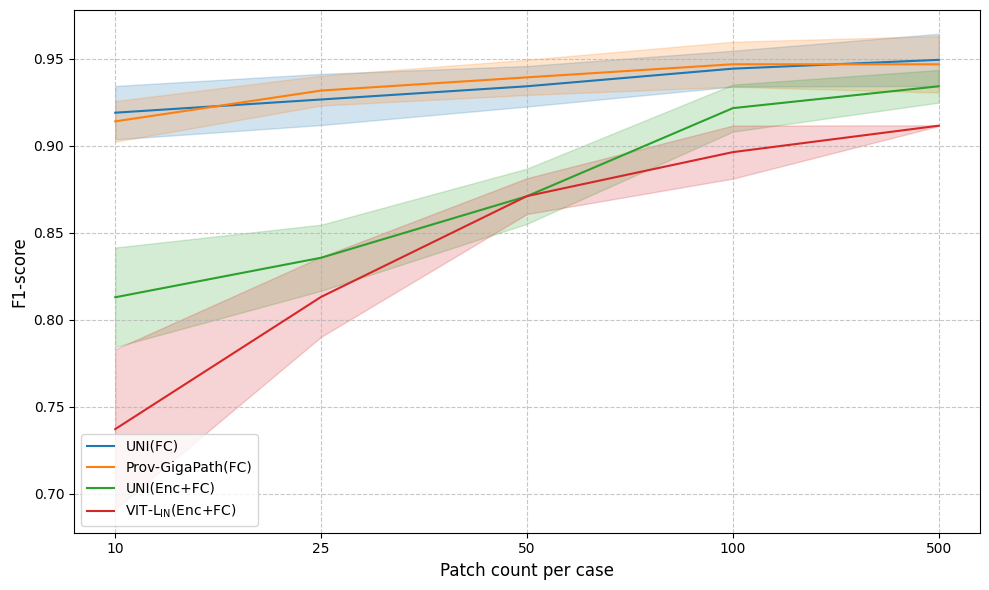

In [14]:
draw_lines('acc')